Exploratory Data Analysis

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Ryank\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating train split: 100%|██████████| 785741/785741 [00:03<00:00, 228674.62 examples/s]


In [3]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]
df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,None,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785603,Data Analyst,Junior Data Analyst,"Santa Monica, CA",via Trabajo.org,Full-time,False,"California, United States",2023-09-12 06:00:50,False,False,United States,None,NaN,NaN,"Ramax Search, Inc.","[sql, vba, python, excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']..."
785626,Data Analyst,Data Acquisition Associate,"Tarrytown, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-29 06:01:29,False,False,United States,None,NaN,NaN,Planet Group,[microsoft teams],{'sync': ['microsoft teams']}
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


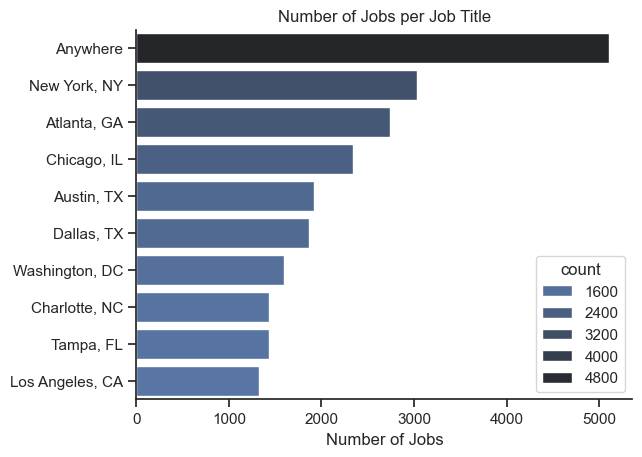

In [12]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r')
sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

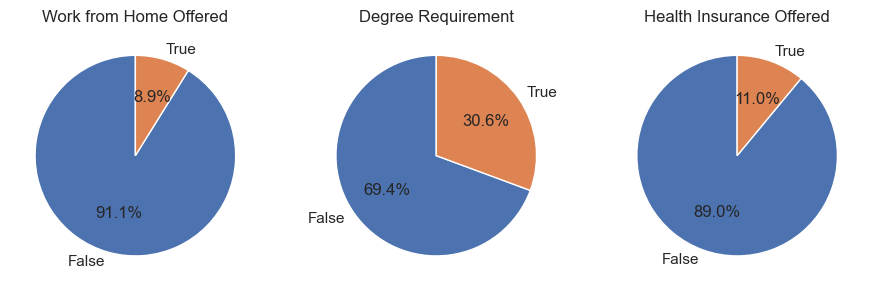

In [13]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

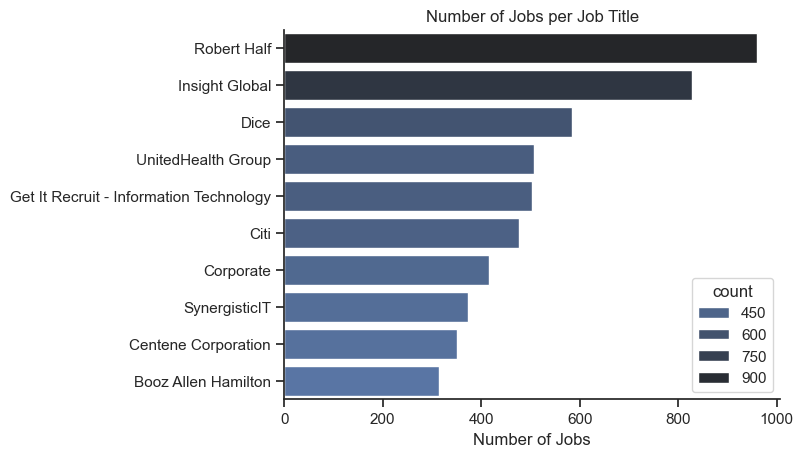

In [14]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()
#use cltr + shift + L to highlight and change same values at once

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r')
sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

In [42]:
df_DA_US_sr = df_DA_US.copy()
df_DA_US_sr['is_senior'] = df_DA_US['job_title'].str.contains('senior', case=False, na=False)
df_DA_US_sr['is_senior'] = df_DA_US_sr['is_senior'].map({True: 'Senior', False: 'Not Senior'})


In [44]:
df_DA_US_sr[df_DA_US_sr['is_senior'] == 'Senior']

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,is_senior
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro...",Senior
2768,Data Analyst,Senior Risk Analytics Consultant - Credit Risk...,"Dallas, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-07-08 13:01:10,True,False,United States,None,NaN,NaN,Wells Fargo,None,None,Senior
3180,Data Analyst,"SVP, Credit Risk Digital Transformation Senior...","Irving, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-03-31 13:02:57,False,False,United States,None,NaN,NaN,Citi,"[excel, powerpoint, word]","{'analyst_tools': ['excel', 'powerpoint', 'wor...",Senior
3722,Data Analyst,Data Analyst Senior (Level 3),"Palmdale, CA",via ZipRecruiter,Full-time,False,"California, United States",2023-01-23 13:01:39,True,False,United States,None,NaN,NaN,Stress Analyst Engineer Senior at Lockheed Mar...,[tableau],{'analyst_tools': ['tableau']},Senior
4793,Data Analyst,"Senior, Data Analyst","Boyd, TX",via Melga,Full-time,False,"Texas, United States",2023-02-08 13:01:21,False,False,United States,None,NaN,NaN,Fidelity Investments,"[sql, sql server, oracle, snowflake, aws, hado...","{'analyst_tools': ['sap'], 'cloud': ['oracle',...",Senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780606,Data Analyst,Senior Business / Data Analyst - Full-time / P...,"Bowie, MD",via Snagajob,Full-time,False,"New York, United States",2023-07-03 05:00:17,False,True,United States,None,NaN,NaN,Guidehouse,"[visio, tableau]","{'analyst_tools': ['visio', 'tableau']}",Senior
781664,Data Analyst,Remote Senior Data Analyst,"Orlando, FL",via BeBee,Full-time,False,"Florida, United States",2023-01-02 06:03:38,True,False,United States,None,NaN,NaN,Insight Global,"[sql, excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint'], 'pr...",Senior
782453,Data Analyst,Healthcare Data Analyst or Senior Healthcare D...,"Chicago, IL",via LinkedIn,Full-time,False,"Illinois, United States",2023-12-14 06:02:21,False,False,United States,None,NaN,NaN,ECG Management Consultants,"[sql, python, r, sql server, azure, power bi, ...","{'analyst_tools': ['power bi', 'tableau', 'wor...",Senior
784430,Data Analyst,SENIOR BI Data Analyst,"Philadelphia, PA",via LinkedIn,Contractor,False,"New York, United States",2023-01-12 06:00:47,False,False,United States,None,NaN,NaN,GSTI,"[sql, sql server, snowflake, microstrategy]","{'analyst_tools': ['microstrategy'], 'cloud': ...",Senior


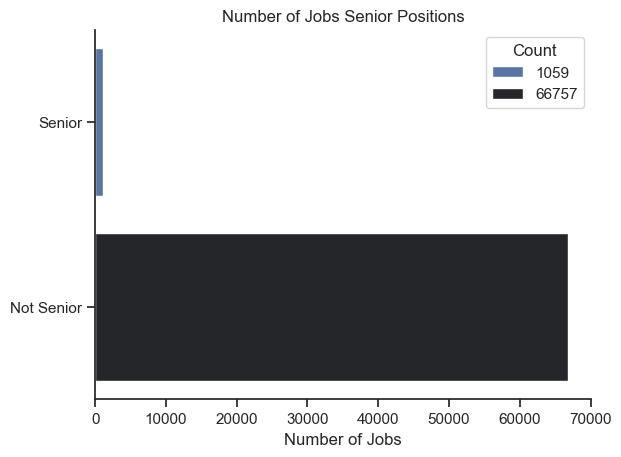

In [ ]:
df_plot = df_DA_US_sr['is_senior'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='is_senior', hue='count', palette='dark:b_r')
sns.despine()
plt.title('Number of Jobs Senior Positions')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.legend(loc='upper right', title='Count')
plt.gca().invert_yaxis() #invert y axis without ordering df
plt.show()